## Imports and global constants

In [4]:
import graphviz as G
import random

FORWARDS = True   # to visualise array from left to right
BACKWARDS = False # to visualise array from right to left

## Layer numbers corresponding to the number of rows of array data (must be contiguous)

In [72]:
layer_num = [1, 2, 3, 4, 5] # row numbers
cells = [5, 5, 5, 5, 5]     # number of data fields in each row i.e., columns in each row

diff = [x - layer_num[i] for i, x in enumerate(layer_num[1:])]
assert diff == [1]*(len(layer_num) - 1), '"layer_num" should contain contiguous numbers only'
assert len(layer_num) == len(cells), "'cells' list and 'layer_num' list should contain same number of entries"

direction = FORWARDS        # control the direction  
include_zero = True         # for time series based data

start = 0 if include_zero else 1

r = lambda: random.randint(0,255)  # to generate random colors for each row 

dot = G.Graph(comment='Matrix', 
              graph_attr={'nodesep':'0.02', 'ranksep':'0.02', 'bgcolor':'transparent'},
              node_attr={'shape':'box3d'})

for l in layer_num:
    if l != 1:
        dot.edge(str(l-1)+str(start), str(l)+str(start), style='invis') # invisible edges to contrain layout
    with dot.subgraph() as sg:
        sg.attr(rank='same')
        color = '#{:02x}{:02x}{:02x}'.format(r(),r(),r())
        for c in range(start, cells[l-1]+start):
            if direction:
                sg.node(str(l)+str(c), 't-'+str(c), style='filled', fillcolor=color)
            else:
                if start == 0:
                    sg.node(str(l)+str(c), 't-'+str(cells[l-1]-c-1), style='filled', fillcolor=color)
                else:
                    sg.node(str(l)+str(c), 't-'+str(cells[l-1]-c), style='filled', fillcolor=color)                    

## Render

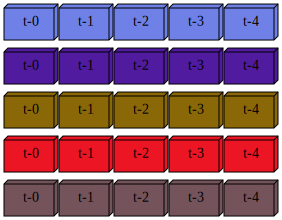

In [73]:
dot

## Save/Export

In [29]:
# dot.format = 'jpeg' # or PDF, SVG, JPEG, PNG, etc. 

In [ ]:
# to save the file, pdf is default
dot.render('./input_array')

In [37]:
dot.source

'// Matrix\ngraph {\n\tgraph [bgcolor=transparent nodesep=0.02 ranksep=0.02]\n\tnode [shape=box3d]\n\t{\n\t\trank=same\n\t\t10 [label="t-5" fillcolor="#65a86a" style=filled]\n\t\t11 [label="t-4" fillcolor="#65a86a" style=filled]\n\t\t12 [label="t-3" fillcolor="#65a86a" style=filled]\n\t\t13 [label="t-2" fillcolor="#65a86a" style=filled]\n\t\t14 [label="t-1" fillcolor="#65a86a" style=filled]\n\t}\n\t11 -- 21 [style=invis]\n\t{\n\t\trank=same\n\t\t20 [label="t-5" fillcolor="#0f42bb" style=filled]\n\t\t21 [label="t-4" fillcolor="#0f42bb" style=filled]\n\t\t22 [label="t-3" fillcolor="#0f42bb" style=filled]\n\t\t23 [label="t-2" fillcolor="#0f42bb" style=filled]\n\t\t24 [label="t-1" fillcolor="#0f42bb" style=filled]\n\t}\n\t21 -- 31 [style=invis]\n\t{\n\t\trank=same\n\t\t30 [label="t-5" fillcolor="#ccdbd7" style=filled]\n\t\t31 [label="t-4" fillcolor="#ccdbd7" style=filled]\n\t\t32 [label="t-3" fillcolor="#ccdbd7" style=filled]\n\t\t33 [label="t-2" fillcolor="#ccdbd7" style=filled]\n\t\t34 [